# **ADVANCED REGRESSION - HOUSE PRICE PREDICTION**

## **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress the warnings.
import warnings
warnings.filterwarnings('ignore')

## **DATA SOURCING & UNDERSTANDING**

In [2]:
pd.set_option('display.max_rows', None)
# read data from csv
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [3]:
# print top 5 rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check the shape of dataframe
df.shape

(1460, 81)

In [5]:
# get detailed info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# get desciption of quantitative variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## **DATA CLEANING**

In [7]:
# check the columns in data frame
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### **Handling null values**

**Finding the percentage of null values**

In [8]:
df.isnull().sum()*100/len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

**Removing columns having null values greater than 80% and the ID column**

In [9]:
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

**Substitute the null values as Not Applicable in remaining categorical values**

In [10]:
df[['FireplaceQu','BsmtQual','GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'GarageType', 
    'GarageQual', 'GarageCond']]=df[['FireplaceQu','BsmtQual','GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageCond']].replace(np.nan,'Not Applicable')

**Replacing the null values in numerical columns with median to counter the effect of outliers**

In [11]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True) 
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

**Finding the sum of remaining null values in the dataframe**

In [12]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


**Substituting the null values in categorical columns with their respective mode**

In [13]:
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

**Substituting null values in garage build yr with a dummy value which will be later taken care of by binning**

In [14]:
df['GarageYrBlt'].fillna('10000',inplace=True)
df['GarageYrBlt']=df['GarageYrBlt'].astype('int64')

In [15]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### **Creating derived variables**

In [16]:
df['house_age']=df['YrSold']-df['YearBuilt']
df['remodel']=df['YrSold']-df['YearRemodAdd']
df['garage_age']=df['YrSold']-df['GarageYrBlt']
df['garage_age'][df['garage_age']<-1]=-100

**Binning the garage build yr to categorize the null values of garage build yr**

In [17]:
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]
label=['None','0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['garage_age']=pd.cut(df['garage_age'],bins,labels=label)
df['garage_age'].astype('object')

0         0-10
1        30-40
2         0-10
3         0-10
4         0-10
5        10-20
6         0-10
7        30-40
8        70-80
9        60-70
10       40-50
11        0-10
12       40-50
13        0-10
14       40-50
15       10-20
16       30-40
17       30-40
18        0-10
19       50-60
20        0-10
21       70-80
22        0-10
23       30-40
24       40-50
25        0-10
26        0-10
27        0-10
28       40-50
29       80-90
30       80-90
31       40-50
32        0-10
33       50-60
34        0-10
35        0-10
36       10-20
37       50-60
38       50-60
39         NaN
40       40-50
41       40-50
42       20-30
43       30-40
44       40-50
45        0-10
46        0-10
47        0-10
48         NaN
49       40-50
50        0-10
51       20-30
52       40-50
53       20-30
54       40-50
55       40-50
56        0-10
57        0-10
58        None
59       30-40
60        None
61       70-80
62        0-10
63       10-20
64       10-20
65        0-10
66       3

**Creating variable total surface area as the sum of TotalBsmtSF, 1stFlrSF and 2ndFlrSF**

In [18]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

**Removing the columns from which variables have been derived**

In [19]:
df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold'],axis=1,inplace=True) 

In [20]:
# check the new shape of the data frame
df.shape

(1460, 73)

### **Changing the data types of the columns**

**Converting the datatype of categorical columns having numerical values to category**

In [21]:
df['MSSubClass']=df['MSSubClass'].astype('category') 
df['OverallQual']=df['OverallQual'].astype('category')
df['OverallCond']=df['OverallCond'].astype('category') 

**Replacing the month numbers with respective names**

In [22]:
df['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [23]:
df['MoSold'].head()

0    Feb
1    May
2    Sep
3    Feb
4    Dec
Name: MoSold, dtype: object

### **Checking the data frame for skewness**

In [24]:
# check the shape of the data frame
df.shape

(1460, 73)

**First, filter the numerical and categorical columns**

In [25]:
# filter the categorical columns
cat_cols=df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition', 'garage_age'],
      dtype='object')

In [26]:
# filter the numerical columns
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'house_age', 'remodel', 'TotalSF'],
      dtype='object')

**Now, find the skewness by finding the percentage of unique values in categorical columns**

In [27]:
# find the value counts percentage for columns having 2 unique values
for col in cat_cols:
  if len(df[col].unique()) == 2:
    print(df[col].value_counts(normalize=True)*100)
    print("\n")

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64


AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64




In [28]:
# find the value counts percentage for columns having 3 unique values
for col in cat_cols:
  if len(df[col].unique()) == 3:
    print(df[col].value_counts(normalize=True)*100)
    print("\n")

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64




In [29]:
# find the value counts percentage for columns having 4 unique values
for col in cat_cols:
  if len(df[col].unique()) == 4:
    print(df[col].value_counts(normalize=True)*100)
    print("\n")

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64


Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64


None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64


TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64


TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64


Unf               41.438356
RFn               28.904110
Fin               24.109589
Not Applicable     5.547945
Name: GarageFinish, dtype: float64




In [30]:
# find the value counts percentage for columns having 5 unique values
for col in cat_cols:
  if len(df[col].unique()) == 5:
    print(df[col].value_counts(normalize=True)*100)
    print("\n")

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64


Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64


1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64


TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64


TA                44.452055
Gd                42.328767
Ex                 8.287671
Not Applicable     2.534247
Fa                 2.397260
Name: BsmtQual, dtype: float64


TA                89.794521
Gd                 4.452055
Fa                 3.082192
Not Applicable     2.534247
Po                 0.136986
Name: BsmtCond, dtype: float64


No                65.273973
Av                15.136986
Gd                 9.178082
Mn                 7.808219
Not Applicable    

In [31]:
# find the value counts percentage for columns having more than 5 unique values
for col in cat_cols:
  if len(df[col].unique()) > 5:
    print(df[col].value_counts(normalize=True)*100)
    print("\n")

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64


NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64


Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn    

**Removing the highly skewed columns based on the above analysis**

In [32]:
df.drop(['Street', 'Utilities', 'CentralAir', 'LandSlope', 'PavedDrive','LandContour','BsmtCond','BldgType','ExterCond','Electrical','Condition1',
         'Condition2','RoofMatl','BsmtFinType2','Heating','Functional','GarageQual','GarageCond','SaleType','SaleCondition'],axis=1,inplace=True)

**Combining the low frequency values in certain columns as one as they pose as a problem during dummy variables creation & feature selection as they'll be selected during RFE but their VIF will be infinity**

In [33]:
# combing all the low frequency attributes are combined and named as 'others'
df['LotShape'] = df['LotShape'].replace(['IR1','IR2','IR3'], 'IR')
df['MasVnrType'] = df['MasVnrType'].replace(['Stone','BrkCmn'], 'others')
df['ExterQual'] = df['ExterQual'].replace(['Ex','Fa'], 'Gd')
df['BsmtQual'] = df['BsmtQual'].replace(['Not Applicable','Ex','Fa'], 'others')
df['BsmtExposure'] = df['BsmtExposure'].replace(['Not Applicable','Av','Gd','Mn'], 'others')
df['KitchenQual'] = df['KitchenQual'].replace(['Ex','Fa'], 'others')
df['MSZoning'] = df['MSZoning'].replace(['RM','FV','RH','C (all)'], 'others')
df['LotConfig'] = df['LotConfig'].replace(['Corner','CulDSac','FR2','FR3'], 'others')
df['HouseStyle'] = df['HouseStyle'].replace(['1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], 'others')
df['RoofStyle'] = df['RoofStyle'].replace(['Hip','Flat','Gambrel','Mansard','Shed'], 'others')
df['Exterior1st'] = df['Exterior1st'].replace(['Plywood','CemntBd','BrkFace','WdShing','Stucco','AsbShng','Stone','BrkComm','AsphShn','CBlock','ImStucc' ], 'others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['Plywood','CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock','Other'], 'others')
df['Foundation'] = df['Foundation'].replace(['BrkTil','Slab','Stone','Wood'], 'others')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(['Not Applicable','BLQ','Rec','LwQ'], 'others')
df['HeatingQC'] = df['HeatingQC'].replace(['Gd','Fa','Po'], 'others')
df['FireplaceQu'] = df['FireplaceQu'].replace(['Fa','Ex','Po'], 'others')
df['GarageType'] = df['GarageType'].replace(['BuiltIn','Not Applicable','BuitIn','Basement','Basment','CarPort','2Types'], 'others')
df['OverallCond'] = df['OverallCond'].replace([1,2,3,4], 'Poor')
df['OverallQual'] = df['OverallQual'].replace([1,2,3,4], 'Poor')
df['OverallQual'] = df['OverallQual'].replace([9,10], 'Excellent')
df['OverallCond'] = df['OverallCond'].replace([8,9,10], 'Excellent')

In [34]:
# check the new shape of data frame
df.shape

(1460, 53)

In [35]:
cat_cols=df.select_dtypes(exclude=np.number).columns
num_cols=df.select_dtypes(include=np.number).columns

In [36]:
len(num_cols)

29

In [37]:
len(cat_cols)

24

### **Outlier Detection**

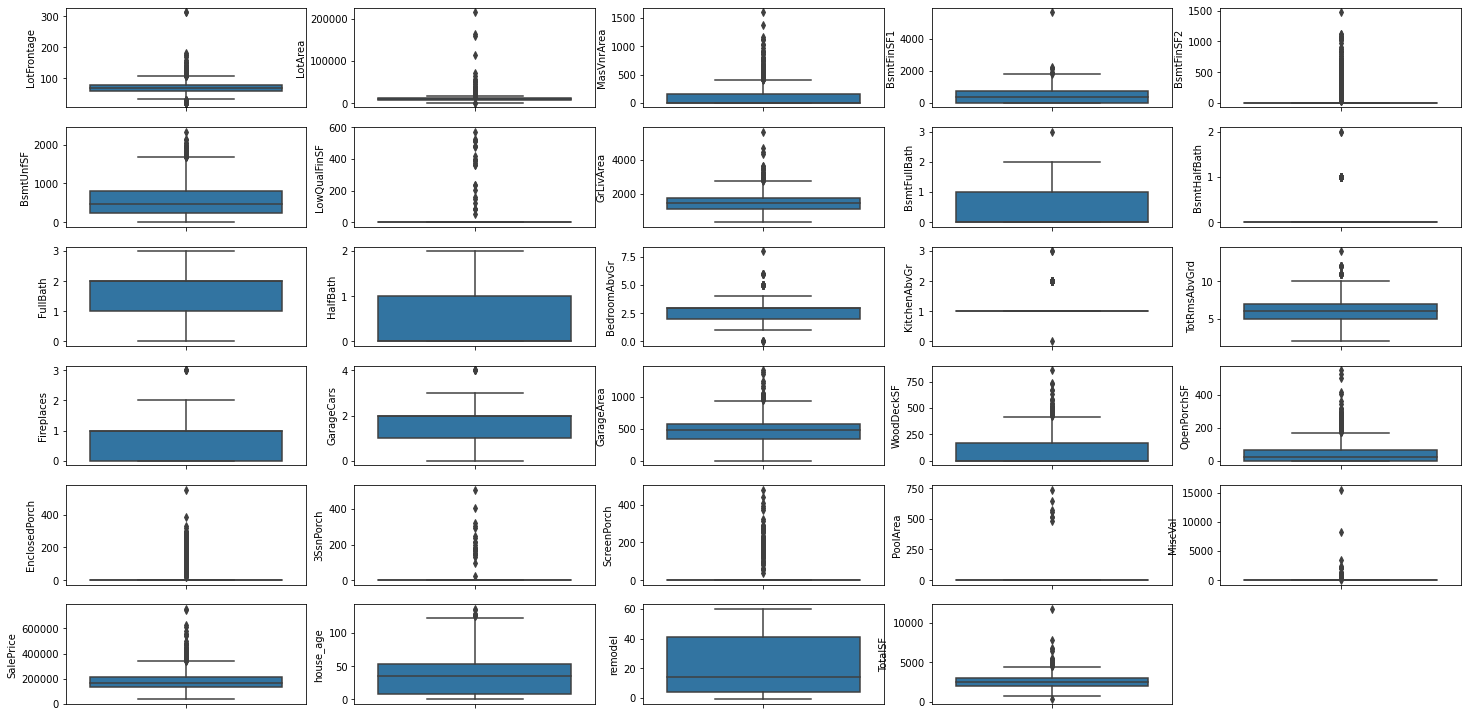

In [38]:
plt.figure(figsize=(25,15))
for i in enumerate(num_cols): 
    ax = plt.subplot(7, 5, i[0]+1)
    sns.boxplot(y=i[1], data=df[num_cols])
plt.show()

**There are certain outliers in the data set but these will be ignored for the being as they will be automatically handled by scaling**

## **EDA**

In [39]:
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'house_age', 'remodel', 'TotalSF'],
      dtype='object')

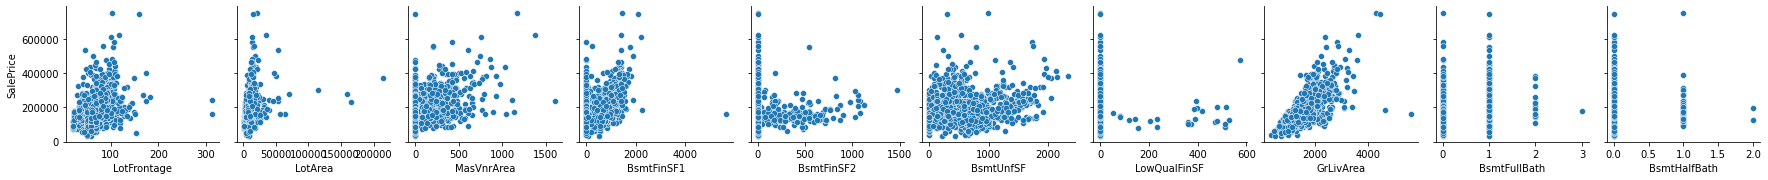

In [40]:
# pair plot to study the relation between numerical variables and sale price
sns.pairplot(x_vars=num_cols[:10],y_vars='SalePrice',data=df[num_cols])

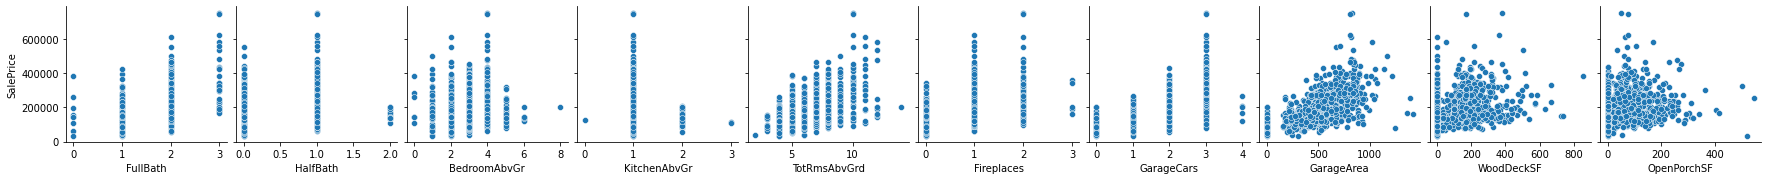

In [41]:
sns.pairplot(x_vars=num_cols[10:20],y_vars='SalePrice',data=df[num_cols])

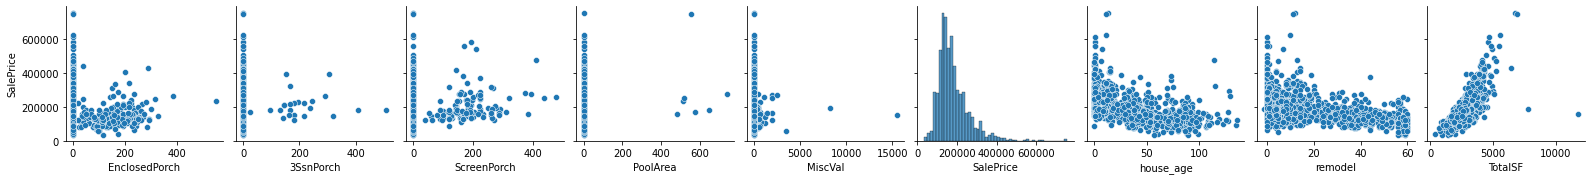

In [42]:
sns.pairplot(x_vars=num_cols[20:],y_vars='SalePrice',data=df[num_cols])

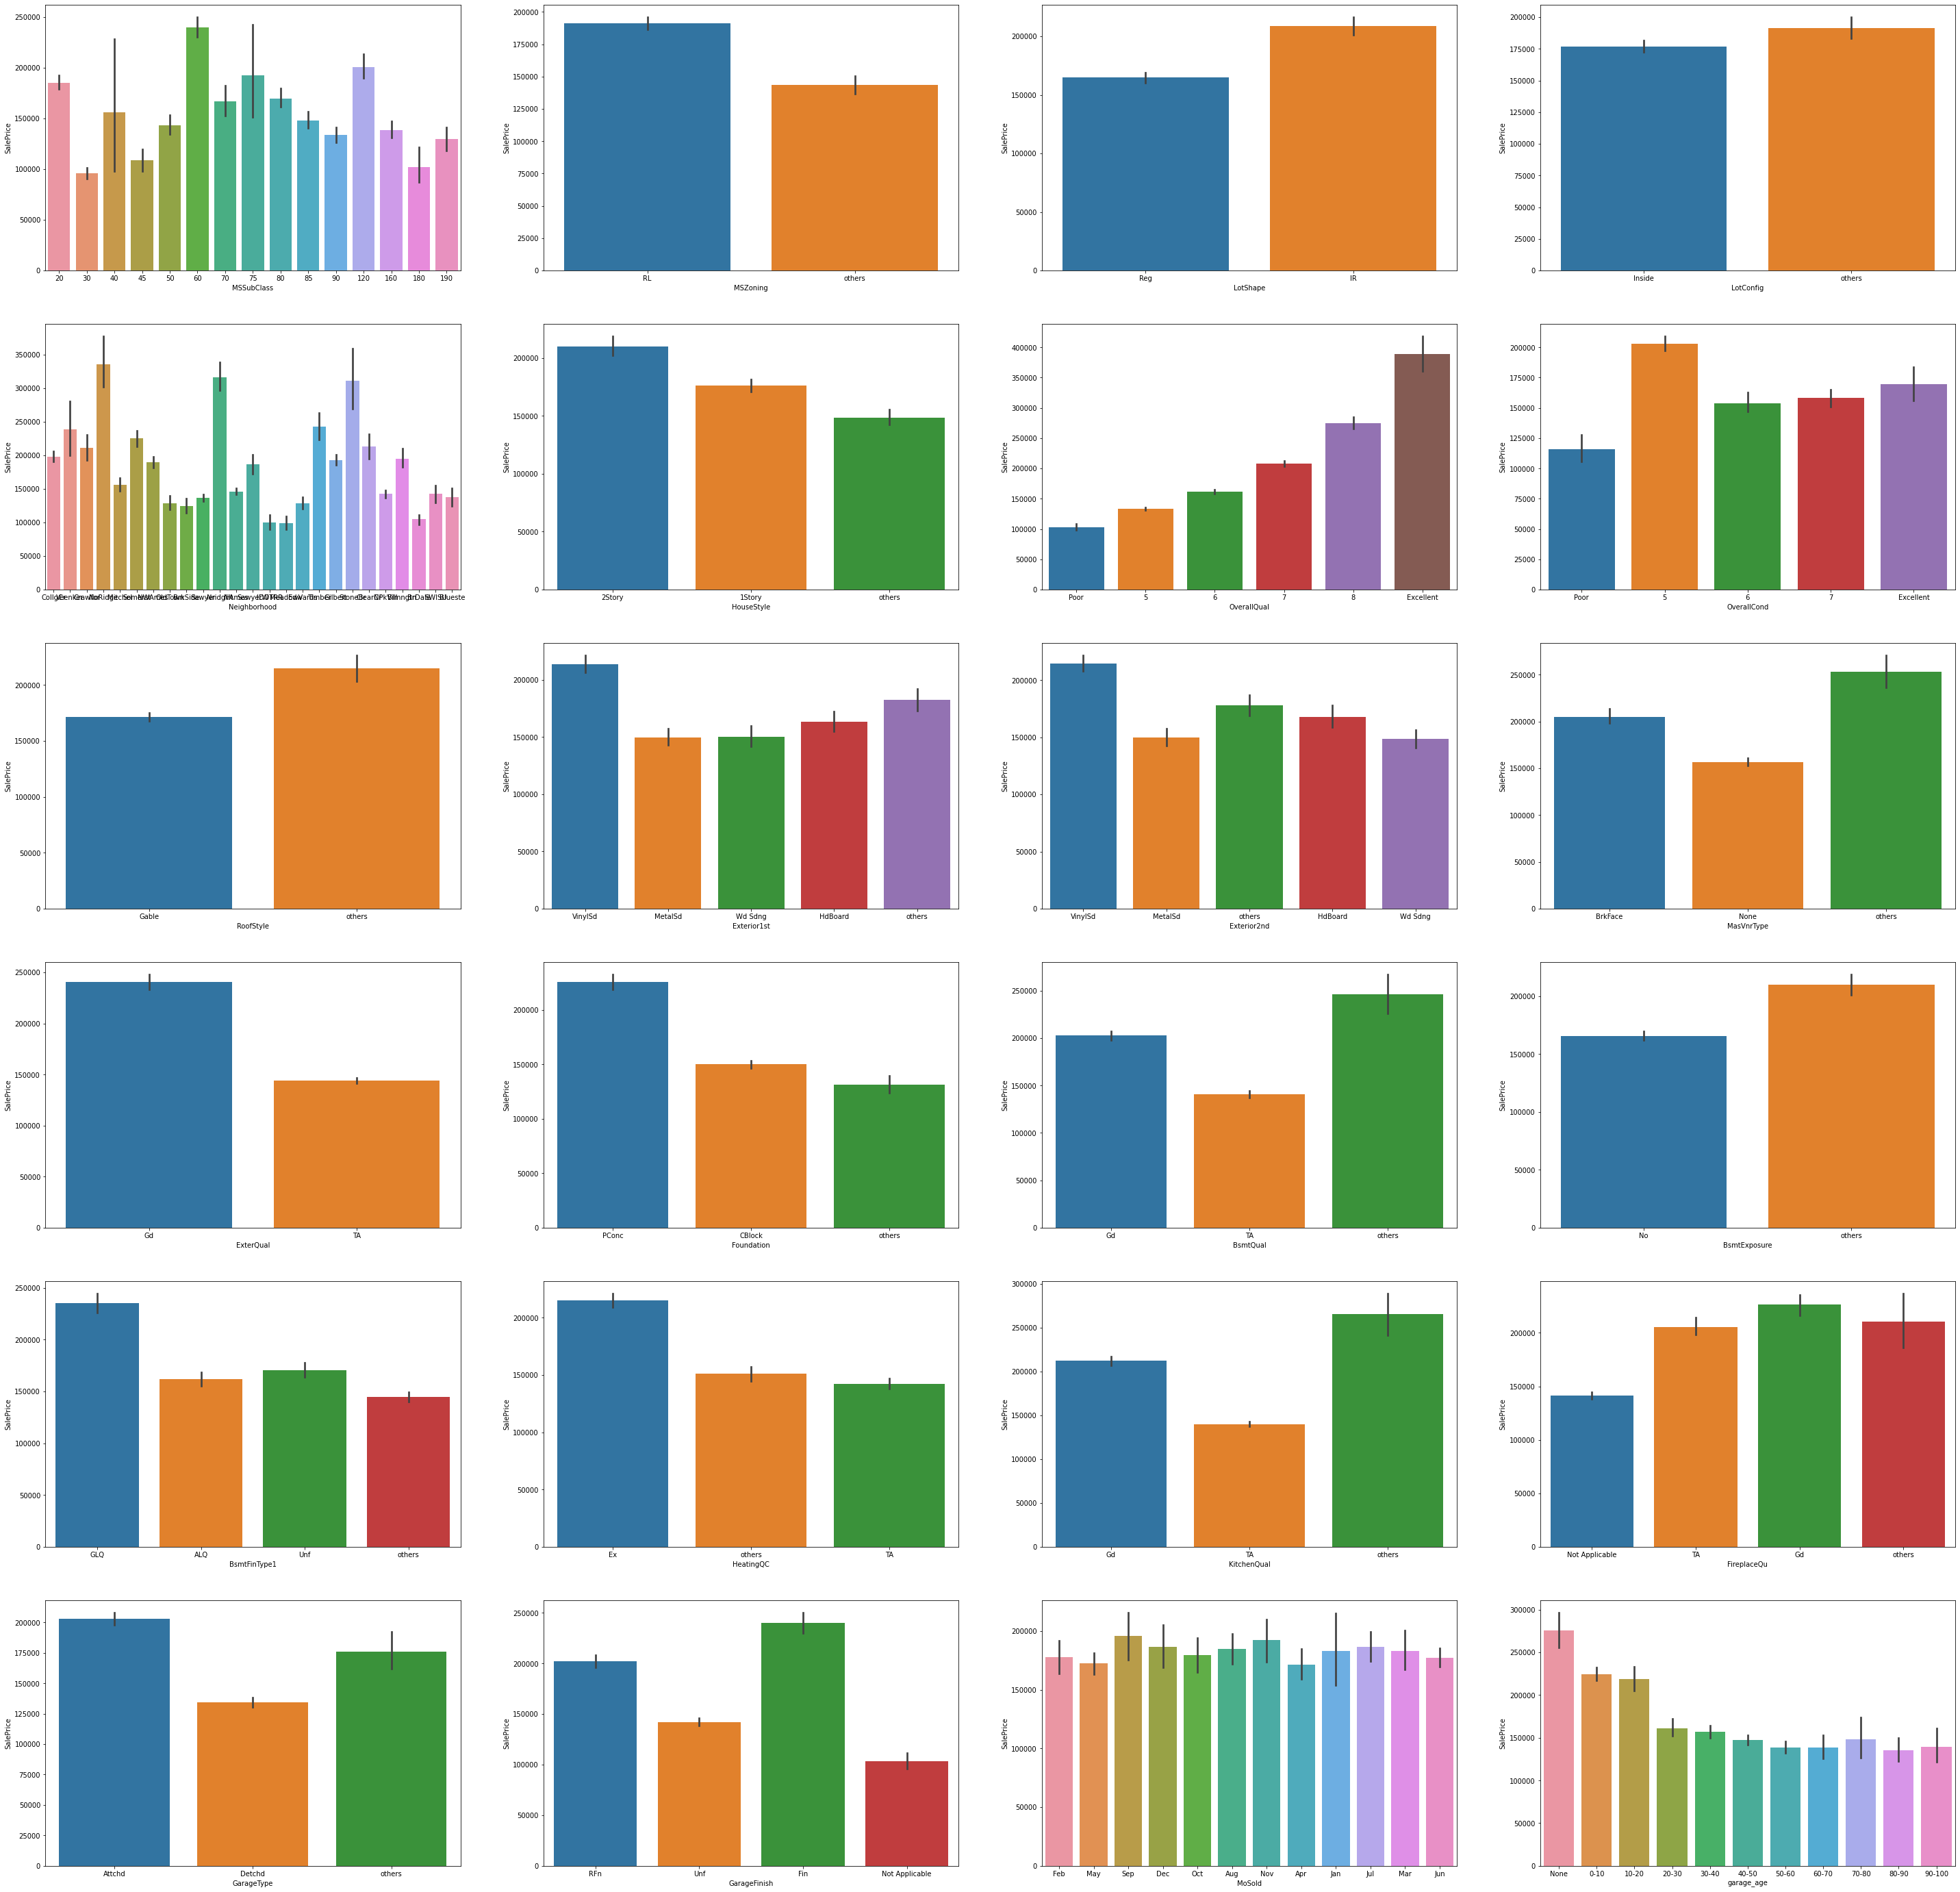

In [43]:
# bar plots to study the distribution of categorical variables with sale price
plt.figure(figsize=(50,50))
j=1
for i in cat_cols:
    plt.subplot(6,4,j)
    sns.barplot(df[i],df['SalePrice'])
    j+=1

**As per the distribution of the dependent variable with the independent variables, there is no such need of transforming data.**

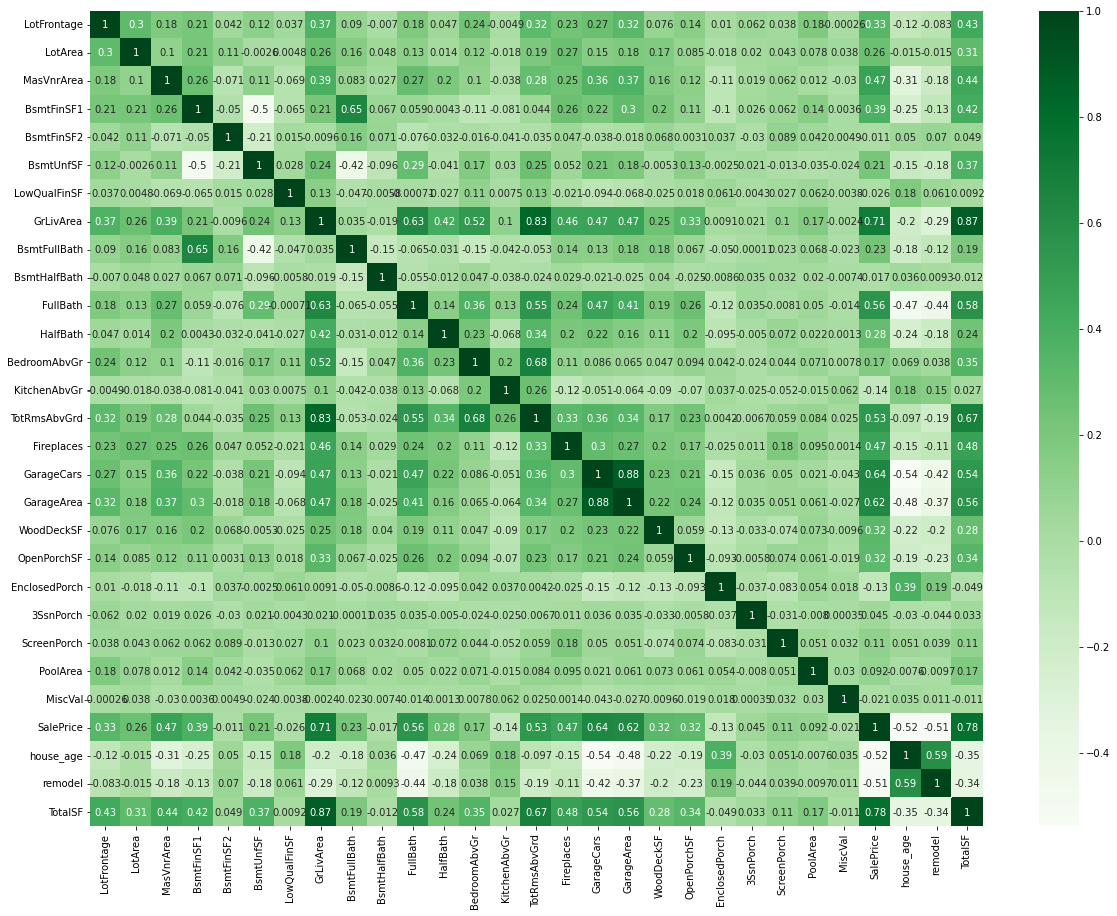

In [44]:
# heatmap to check the correlation among the numerical variables
plt.figure(figsize=(20,15))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Greens') 

**The highly correlated columns will be taken care of in the later stage by RFE and manual feature eleimination on the basis of VIF**

## **DATA PREPARATION**

In [45]:
len(num_cols)

29

In [46]:
len(cat_cols)

24

### **Creating dummy variables for categorical variables**

In [47]:
# create dummies for categorical variables
df = pd.get_dummies(data=df,columns=cat_cols)

In [48]:
# check the new shape of the data frame
df.shape

(1460, 158)

**Removing unwanted dummy variables created due to the others values created in the earlier stage or otherwise they'll be selected during RFE but their VIF will be infinity**

In [49]:
df.drop(['MSZoning_others', 'LotShape_IR', 'LotConfig_others', 'HouseStyle_others',
       'RoofStyle_others', 'Exterior1st_others', 'Exterior2nd_others', 'MasVnrType_others', 'ExterQual_Gd',
       'Foundation_others', 'BsmtQual_others', 'BsmtExposure_others', 'BsmtFinType1_others', 'HeatingQC_others',
       'KitchenQual_others', 'FireplaceQu_others', 'GarageType_others','Neighborhood_Blmngtn','GarageFinish_Not Applicable','garage_age_None', 
       'MSSubClass_20', 'OverallCond_Poor', 'OverallQual_Poor'],axis=1,inplace=True)

In [50]:
# check the new shape of the data frame
df.shape

(1460, 135)

### **Splitting data into train test**

In [51]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=42)

In [52]:
df_train.shape

(1021, 135)

In [53]:
df_test.shape

(439, 135)

### **Scaling the features using Standard Scaler**

In [54]:
scaler = StandardScaler()
# fitting and transforming on the train data
df_train[num_cols]=scaler.fit_transform(df_train[num_cols]) 
# transforming the test data
df_test[num_cols]=scaler.transform(df_test[num_cols])

### **Assigning X & y train test**

In [55]:
# assigning X_train and y_train
X_train=df_train.drop('SalePrice',axis=1)
y_train=df_train['SalePrice']
# assigning X_test and y_test
X_test=df_test.drop('SalePrice',axis=1)
y_test=df_test['SalePrice']

In [56]:
X_train.shape

(1021, 134)

In [57]:
X_test.shape

(439, 134)

In [58]:
y_train.shape

(1021,)

In [59]:
y_test.shape

(439,)

## **DATA MODELLING**

### **Feature selection using RFE**

In [60]:
# Running RFE with the output number of the variables equal to 25
lr = LinearRegression()

rfe = RFE(lr,n_features_to_select=25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [61]:
# columns selected by RFE and their ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 57),
 ('LotArea', False, 59),
 ('MasVnrArea', False, 110),
 ('BsmtFinSF1', False, 52),
 ('BsmtFinSF2', False, 55),
 ('BsmtUnfSF', False, 54),
 ('LowQualFinSF', False, 56),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 10),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 30),
 ('HalfBath', False, 63),
 ('BedroomAbvGr', False, 95),
 ('KitchenAbvGr', False, 15),
 ('TotRmsAbvGrd', False, 64),
 ('Fireplaces', False, 31),
 ('GarageCars', False, 5),
 ('GarageArea', False, 51),
 ('WoodDeckSF', False, 88),
 ('OpenPorchSF', False, 97),
 ('EnclosedPorch', False, 103),
 ('3SsnPorch', False, 65),
 ('ScreenPorch', False, 61),
 ('PoolArea', False, 86),
 ('MiscVal', False, 87),
 ('house_age', True, 1),
 ('remodel', False, 84),
 ('TotalSF', False, 53),
 ('MSSubClass_30', False, 35),
 ('MSSubClass_40', False, 12),
 ('MSSubClass_45', False, 96),
 ('MSSubClass_50', False, 105),
 ('MSSubClass_60', False, 14),
 ('MSSubClass_70', False, 106),
 ('MSSubClass_75', False, 48),
 ('

In [62]:
# features selected by RFE 
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['GrLivArea', 'house_age', 'MSSubClass_120', 'MSSubClass_160',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_Excellent', 'OverallCond_7', 'OverallCond_Excellent'],
      dtype='object')

In [63]:
X_train_new=X_train[rfe_col].copy()

### **Feature selection using VIF and p-value**

In [64]:
# function defined to build a statsmodel api model
def build_model(X):
    X_train_sm = sm.add_constant(X)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [65]:
# function defined to calculate VIF
def check_vif(X):    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [66]:
# Check the VIF and models summary for the data frame columns
lr1 = build_model(X_train_new)
check_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     176.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:38:59   Log-Likelihood:                -585.42
No. Observations:                1021   AIC:                             1223.
Df Residuals:                     995   BIC:                             1351.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

**These features will be used to build the model using Ridge & Lasso Regression as they do not have VIF >= 5 or p-value > 0.05**

### **Ridge Regression**

In [67]:
# defining hyperparameters for alpha 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [68]:
# applying ridge regression using grid search
ridge = Ridge()
folds = 5
model_ridge= GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_ridge.fit(X_train_new,y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5,
                                   0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# creating data frame for the grid search results
cv_results = pd.DataFrame(model_ridge.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007415,0.002651,0.003568,0.000363,0.0001,{'alpha': 0.0001},-0.288400,-0.343008,-0.282273,-0.282275,...,-0.290576,0.028370,16,-0.279338,-0.263393,-0.280119,-0.277173,-0.287664,-0.277538,0.007907
1,0.005718,0.001286,0.003507,0.000363,0.001,{'alpha': 0.001},-0.288395,-0.343011,-0.282270,-0.282273,...,-0.290573,0.028373,15,-0.279336,-0.263394,-0.280116,-0.277172,-0.287661,-0.277536,0.007906
2,0.004939,0.000219,0.003233,0.000124,0.01,{'alpha': 0.01},-0.288348,-0.343041,-0.282241,-0.282247,...,-0.290548,0.028400,14,-0.279314,-0.263394,-0.280088,-0.277152,-0.287632,-0.277516,0.007896
3,0.004765,0.000141,0.003120,0.000163,0.05,{'alpha': 0.05},-0.288137,-0.343172,-0.282115,-0.282132,...,-0.290437,0.028521,13,-0.279218,-0.263397,-0.279967,-0.277066,-0.287507,-0.277431,0.007852
4,0.004682,0.000081,0.003075,0.000130,0.1,{'alpha': 0.1},-0.287880,-0.343334,-0.281959,-0.281991,...,-0.290301,0.028671,12,-0.279100,-0.263402,-0.279819,-0.276961,-0.287360,-0.277328,0.007798


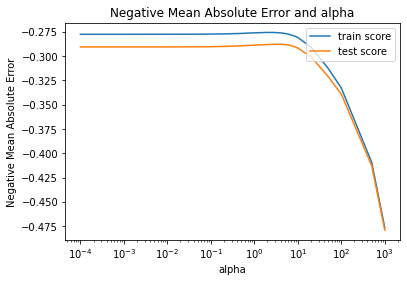

In [70]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# plotting negative mean abs error wrt alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
# finding the best alpha for ridge regression
model_ridge.best_params_

{'alpha': 4.0}

In [72]:
# fitting model with alpha = 4
ridge=Ridge(alpha=4.00)
ridge_model=ridge.fit(X_train_new,y_train)
# making predictions on the test data
y_pred_ridge=ridge_model.predict(X_test[X_train_new.columns])
# making predictions on the train data
y_pred_train = ridge_model.predict(X_train_new)

In [73]:
# printing rmse and r2 score for training & testing data
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_ridge)))

RMSE train: 0.4335104608013494
R2 score Train: 0.8120686803758017


RMSE test: 0.4104429575298137
R2 score test: 0.8542296508464821


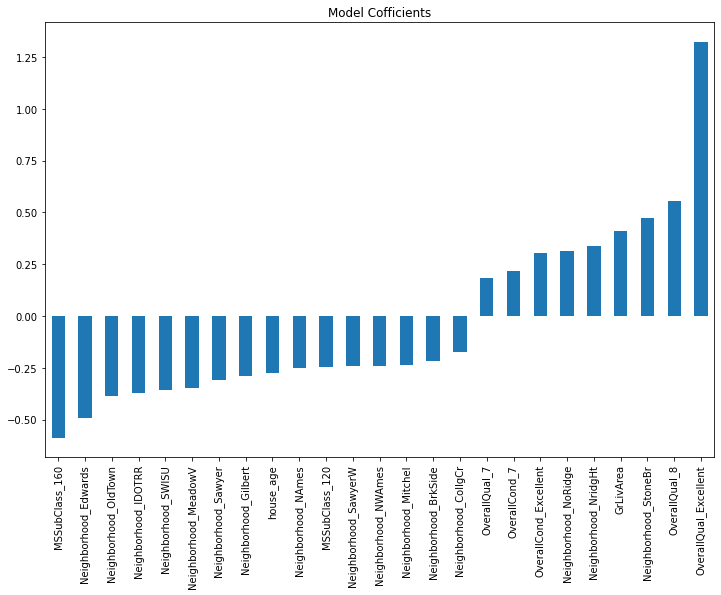

In [74]:
# plotting the parameters wrt their coeff
plt.figure(figsize=(12,8))
pred = X_train_new.columns
coef = pd.Series(ridge_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")

In [75]:
# printing the top 10 parameters & their coeff
ridge_model_parameter = list(ridge_model.coef_)
ridge_model_parameter.insert(0,ridge_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
23,OverallCond_7,1.321460
22,OverallQual_Excellent,0.556113
20,OverallQual_7,0.473171
1,house_age,0.411751
15,Neighborhood_OldTown,0.335486
14,Neighborhood_NridgHt,0.311692
24,OverallCond_Excellent,0.214961
21,OverallQual_8,0.182313
0,GrLivArea,0.008203
6,Neighborhood_Edwards,-0.175749


Text(0, 0.5, 'Housing Price Predictions')

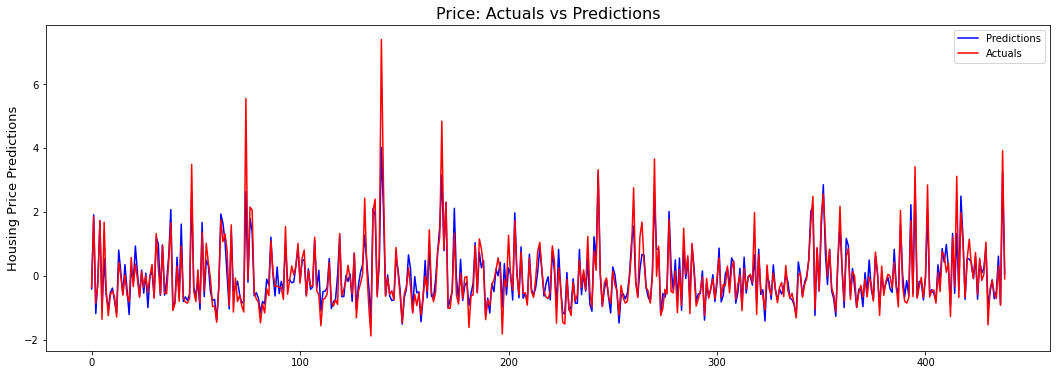

In [76]:
# plotting the house price predictions wrt actual values
fig, ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=range(len(y_pred_ridge)),y=y_pred_ridge,label='Predictions',color='blue',ax=ax)
sns.lineplot(x=range(len(y_pred_ridge)),y=y_test,label='Actuals',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Housing Price Predictions',fontsize=13)

### **Lasso Regression**

In [77]:
# defining hyperparameters for alpha 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [78]:
# applying lasso regression using grid search
lasso = Lasso()
folds = 5
model_lasso= GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_lasso.fit(X_train_new,y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5,
                                   0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# creating data frame for the grid search results
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007159,0.003769,0.003170,0.000147,0.0001,{'alpha': 0.0001},-0.287761,-0.343482,-0.281688,-0.281742,...,-0.290208,0.028752,2,-0.278908,-0.263415,-0.279622,-0.276792,-0.287130,-0.277174,0.007715
1,0.005116,0.000062,0.003016,0.000047,0.001,{'alpha': 0.001},-0.283489,-0.348406,-0.278603,-0.279579,...,-0.288748,0.031637,1,-0.276366,-0.265006,-0.276727,-0.274585,-0.284472,-0.275431,0.006224
2,0.004887,0.000150,0.003254,0.000338,0.01,{'alpha': 0.01},-0.287086,-0.393354,-0.280214,-0.289822,...,-0.306167,0.043755,3,-0.298431,-0.292491,-0.299099,-0.297841,-0.301201,-0.297812,0.002893
3,0.009435,0.006054,0.003314,0.000378,0.05,{'alpha': 0.05},-0.358959,-0.494706,-0.348834,-0.377417,...,-0.386473,0.055005,4,-0.388787,-0.362776,-0.392109,-0.380602,-0.386703,-0.382195,0.010409
4,0.006178,0.001443,0.003593,0.000522,0.1,{'alpha': 0.1},-0.374764,-0.487176,-0.367811,-0.381852,...,-0.395276,0.046328,5,-0.400763,-0.364674,-0.401442,-0.393877,-0.399674,-0.392086,0.013964


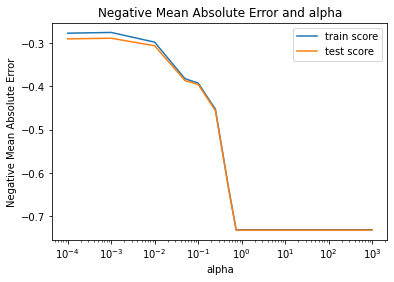

In [80]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# plotting negative mean abs error wrt alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
# finding the best alpha for lasso regression
model_lasso.best_params_

{'alpha': 0.001}

In [82]:
# fitting model with alpha = 0.001
lasso=Lasso(alpha=0.001)
lasso_model=lasso.fit(X_train_new,y_train)
# making predictions on the test data
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
# making predictions on the train data
y_pred_train = lasso_model.predict(X_train_new)

In [83]:
# printing rmse and r2 score for training & testing data
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.4313808601216248
R2 score Train: 0.8139105535207272


RMSE test: 0.40565988208903114
R2 score test: 0.8576073090295039


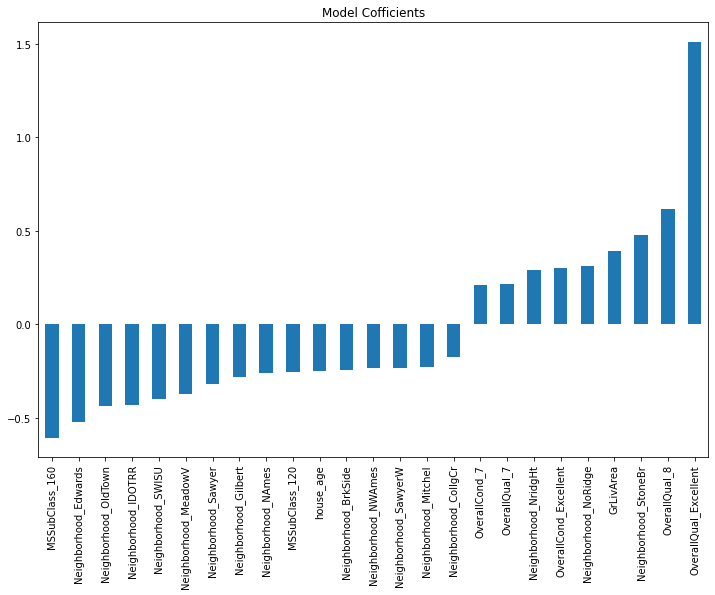

In [84]:
# plotting the parameters wrt their coeff
plt.figure(figsize=(12,8))
pred = X_train_new.columns
coef = pd.Series(lasso_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")

In [85]:
# printing the top 10 parameters & their coeff
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
23,OverallCond_7,1.509779
22,OverallQual_Excellent,0.617485
20,OverallQual_7,0.480257
1,house_age,0.394301
14,Neighborhood_NridgHt,0.311169
15,Neighborhood_OldTown,0.292278
21,OverallQual_8,0.215089
24,OverallCond_Excellent,0.212815
0,GrLivArea,-0.000643
6,Neighborhood_Edwards,-0.171817


Text(0, 0.5, 'Housing Price Predictions')

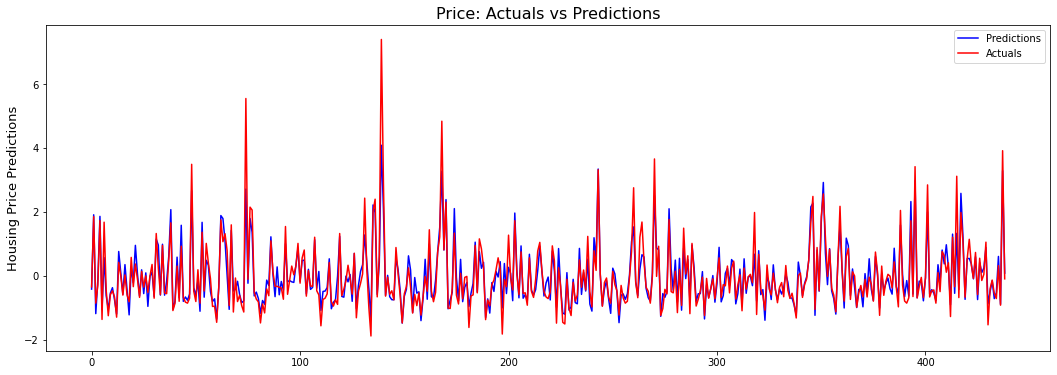

In [86]:
# plotting the house price predictions wrt actual values
fig, ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=range(len(y_pred_lasso)),y=y_pred_lasso,label='Predictions',color='blue',ax=ax)
sns.lineplot(x=range(len(y_pred_lasso)),y=y_test,label='Actuals',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Housing Price Predictions',fontsize=13)

## **MODEL SUMMARY**

Finally, the preferred model is Ridge Regression with alpha = 4 built on 25 parameters. It has a r2-score of 0.854 on the test data.

Ridge is prefered over Lasso because Lasso doesn't perform any kind of feature elimination on its own and its computation cost is also quite high. The difference in the r2-score on test data is not much high so it can be ignored easily in case of Lasso Regression.

The top 10 parameters taken for prediction in case of Ridge Regression are :-

1. OverallCond_7 -	1.321460
2.	OverallQual_Excellent -	0.556113
3.	OverallQual_7 -	0.473171
4.	house_age -	0.411751
5.	Neighborhood_OldTown -	0.335486
6.	Neighborhood_NridgHt -	0.311692
7.	OverallCond_Excellent -	0.214961
8.	OverallQual_8 -	0.182313
9.	GrLivArea -	0.008203
10.	Neighborhood_Edwards -	-0.175749

## **Q1. Double the values of alpha for ridge & lasso regression**

In [87]:
# fitting model with alpha = 8
ridge=Ridge(alpha=8.00)
ridge_model=ridge.fit(X_train_new,y_train)
# making predictions on the test data
y_pred_ridge=ridge_model.predict(X_test[X_train_new.columns])
# making predictions on the train data
y_pred_train = ridge_model.predict(X_train_new)

In [88]:
# printing rmse and r2 score for training & testing data
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_ridge)))

RMSE train: 0.44009195393932626
R2 score Train: 0.8063190720778659


RMSE test: 0.4194384713626674
R2 score test: 0.8477700512445431


In [89]:
# printing the top 5 parameters & their coeff
ridge_model_parameter = list(ridge_model.coef_)
ridge_model_parameter.insert(0,ridge_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

,Feature,Coef
23,OverallCond_7,1.177253
22,OverallQual_Excellent,0.521277
1,house_age,0.432495
20,OverallQual_7,0.424018
15,Neighborhood_OldTown,0.353725


In [90]:
# fitting model with alpha = 0.002
lasso=Lasso(alpha=0.002)
lasso_model=lasso.fit(X_train_new,y_train)
# making predictions on the test data
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
# making predictions on the train data
y_pred_train = lasso_model.predict(X_train_new)

In [91]:
# printing rmse and r2 score for training & testing data
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.43751326328554363
R2 score Train: 0.8085821444492346


RMSE test: 0.4112637150508467
R2 score test: 0.8536460777500916


In [92]:
# printing the top 5 parameters & their coeff
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feature,Coef
23,OverallCond_7,1.512779
22,OverallQual_Excellent,0.645708
20,OverallQual_7,0.439617
1,house_age,0.406658
14,Neighborhood_NridgHt,0.313527


## **Q3. Exclude the top 5 features in Lasso**

In [93]:
# excluding top 5 features
X_train_new = X_train_new.drop(['OverallCond_7','OverallQual_Excellent','OverallQual_7','house_age','Neighborhood_NridgHt'],axis=1)

In [94]:
# applying lasso regression using grid search
lasso = Lasso()
folds = 5
model_lasso= GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_lasso.fit(X_train_new,y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5,
                                   0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# finding the best alpha for lasso regression
model_lasso.best_params_

{'alpha': 0.001}

In [96]:
# fitting model with alpha = 0.001
lasso=Lasso(alpha=0.001)
lasso_model=lasso.fit(X_train_new,y_train)
# making predictions on the test data
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
# making predictions on the train data
y_pred_train = lasso_model.predict(X_train_new)

In [97]:
# printing rmse and r2 score for training & testing data
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.5469468822027997
R2 score Train: 0.7008491080486365


RMSE test: 0.5722561842971627
R2 score test: 0.71663607023481


In [98]:
# printing the top 5 parameters & their coeff
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feature,Coef
18,OverallQual_8,0.633655
1,MSSubClass_120,0.520905
0,GrLivArea,0.490405
19,OverallCond_Excellent,0.320491
13,Neighborhood_OldTown,0.240140
